<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/RNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 6

## RNN Models

## Tensorflow

Persiapan Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


Load dan Persiapkan Dataset

In [21]:
# Load dataset dari JSON
df = pd.read_json("https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/06.%20Week%206/Datasets/DeteksiSarkasme.json", lines=True)

# Kita ambil kolom headline sebagai input dan is_sarcastic sebagai label
texts = df['headline'].values
labels = df['is_sarcastic'].values


Tokenisasi & Padding

In [3]:
print(df.columns)

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')


In [22]:
vocab_size = 30000
maxlen = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')


In [23]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


Latih Model RNN TensorFlow

In [24]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    Bidirectional(SimpleRNN(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(SimpleRNN(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


268/268 ━━━━━━━━━━━━━━━━━━━━ 252s 709ms/step - accuracy: 0.5592 - loss: 0.6811 - val_accuracy: 0.7892 - val_loss: 0.4559
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 198s 738ms/step - accuracy: 0.8319 - loss: 0.3964 - val_accuracy: 0.8327 - val_loss: 0.3728
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 194s 709ms/step - accuracy: 0.9277 - loss: 0.2079 - val_accuracy: 0.8355 - val_loss: 0.4170
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 200s 700ms/step - accuracy: 0.9652 - loss: 0.1176 - val_accuracy: 0.8388 - val_loss: 0.4795
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 199s 742ms/step - accuracy: 0.9806 - loss: 0.0693 - val_accuracy: 0.8257 - val_loss: 0.5674
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 202s 743ms/step - accuracy: 0.9895 - loss: 0.0426 - val_accuracy: 0.8355 - val_loss: 0.6409
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 192s 705ms/step - accuracy: 0.9945 - loss: 0.0231 - val_accuracy: 0.8315 - val_loss: 0.7036
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 189s 705ms/step - accuracy: 0.9959 - loss: 0.01

Evaluasi Model dan Visualisasi

167/167 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step
Accuracy: 0.8278
Precision: 0.8057
Recall: 0.8009
F1 Score: 0.8033
F1 Squared: 0.6453
AUC: 0.9042


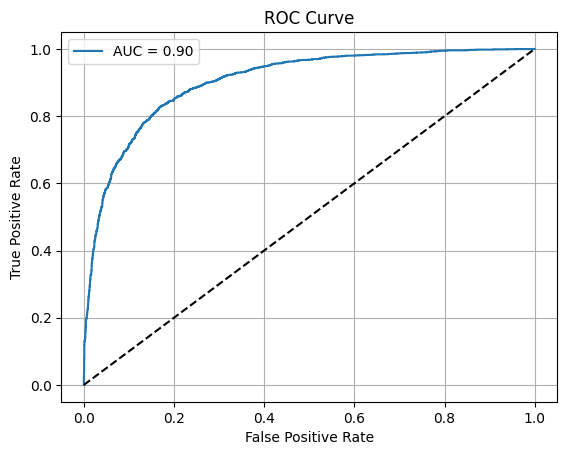

In [25]:
# Prediksi
y_probs = model.predict(X_test).ravel()
y_pred = (y_probs >= 0.5).astype(int)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
f1_squared = f1 ** 2
auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Visualisasi Akurasi & Loss

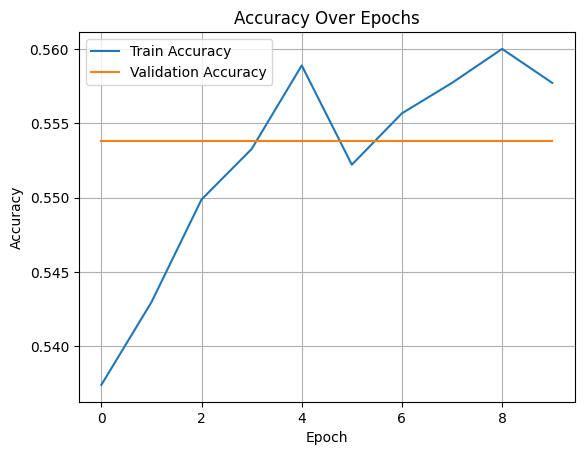

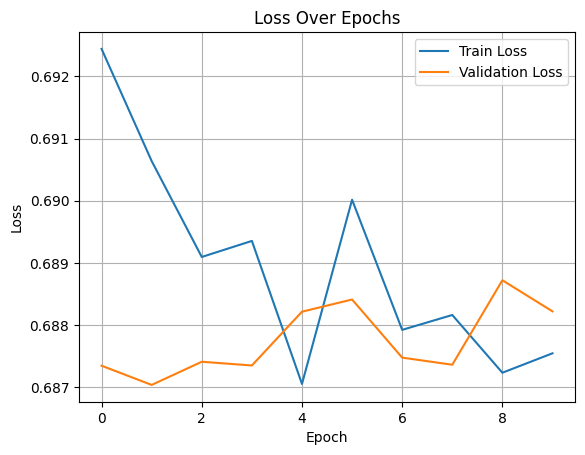

In [9]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Visualisasi ROC Curve

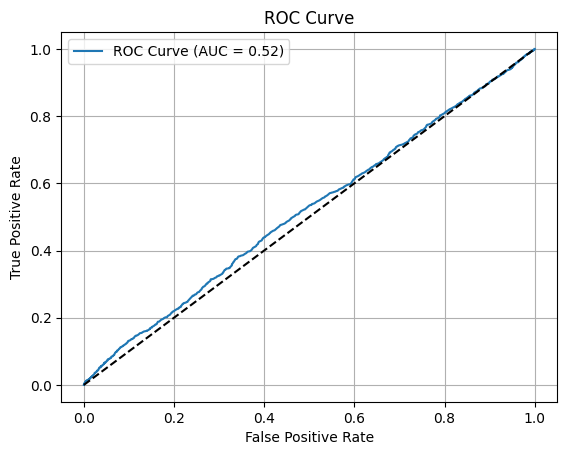

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Hyperparameter Tuning dengan Keras Tuner

In [26]:
def build_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=num_words,
        output_dim=hp.Int('embedding_output', min_value=64, max_value=256, step=64),
        input_length=maxlen
    ))
    model.add(SimpleRNN(
        units=hp.Int('rnn_units_1', min_value=64, max_value=256, step=64),
        return_sequences=True
    ))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(SimpleRNN(
        units=hp.Int('rnn_units_2', min_value=32, max_value=128, step=32)
    ))
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory='rnn_tuner_dir',
    project_name='rnn_hyperband'
)

tuner.search(X_train, y_train, epochs=5, validation_split=0.2)


Trial 10 Complete [00h 16m 16s]
val_accuracy: 0.5547496676445007

Best val_accuracy So Far: 0.5554515719413757
Total elapsed time: 02h 09m 25s


Menampilkan Hyperparameter Terbaik

In [27]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
- Embedding Output: {best_hps.get('embedding_output')}
- RNN Units 1: {best_hps.get('rnn_units_1')}
- Dropout 1: {best_hps.get('dropout_1')}
- RNN Units 2: {best_hps.get('rnn_units_2')}
- Dense Units: {best_hps.get('dense_units')}
""")



Best hyperparameters:
- Embedding Output: 192
- RNN Units 1: 192
- Dropout 1: 0.4
- RNN Units 2: 64
- Dense Units: 128



## Pytorch

Import Library dan Load Dataset

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import nltk
from nltk.tokenize import word_tokenize

In [63]:
import nltk
nltk.download('punkt', force=True)

# Load JSON Lines dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/06.%20Week%206/Datasets/DeteksiSarkasme.json"
df = pd.read_json(url, lines=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preprocessing (Tokenisasi, Vocab, Padding, Encoding)


In [67]:
# Tokenisasi kalimat
df['tokens'] = df['headline'].apply(lambda x: x.lower().split())

# Buat vocabulary
all_tokens = [token for tokens in df['tokens'] for token in tokens]
vocab = {word: i+2 for i, word in enumerate(set(all_tokens))}
vocab['<PAD>'] = 0
vocab['<UNK>'] = 1

# Encode token ke index
def encode(tokens):
    return [vocab.get(word, 1) for word in tokens]

df['input_ids'] = df['tokens'].apply(encode)

# Padding manual
max_len = max(df['input_ids'].apply(len))
df['input_ids'] = df['input_ids'].apply(lambda x: x + [0]*(max_len - len(x)))

# Encode label (0 = not sarcastic, 1 = sarcastic)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['is_sarcastic'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    list(df['input_ids']), list(df['label']), test_size=0.2, random_state=42)


Dataset Class dan DataLoader

In [68]:
class SarcasmDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = torch.tensor(inputs, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.labels[idx]

train_dataset = SarcasmDataset(X_train, y_train)
test_dataset = SarcasmDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


Model RNN

In [69]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        out, _ = self.rnn(embedded)
        out = out[:, -1, :]
        out = self.fc(out)
        return self.sigmoid(out).squeeze()


Training Model

In [70]:
model = RNNModel(vocab_size=len(vocab), embed_dim=64, hidden_dim=128)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss_history = []
train_acc_history = []

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        all_preds.extend((outputs > 0.5).detach().cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    train_loss_history.append(total_loss / len(train_loader))
    train_acc_history.append(acc)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f} - Accuracy: {acc:.4f}")


Epoch 1/10 - Loss: 460.4622 - Accuracy: 0.5543
Epoch 2/10 - Loss: 450.8410 - Accuracy: 0.5797
Epoch 3/10 - Loss: 416.2390 - Accuracy: 0.6620
Epoch 4/10 - Loss: 394.3423 - Accuracy: 0.6925
Epoch 5/10 - Loss: 366.6171 - Accuracy: 0.7239
Epoch 6/10 - Loss: 340.7197 - Accuracy: 0.7571
Epoch 7/10 - Loss: 359.1849 - Accuracy: 0.7384
Epoch 8/10 - Loss: 346.3547 - Accuracy: 0.7554
Epoch 9/10 - Loss: 325.3824 - Accuracy: 0.7801
Epoch 10/10 - Loss: 333.9713 - Accuracy: 0.7696


Evaluasi dan Metrik

In [71]:
model.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        all_probs.extend(outputs.numpy())
        all_preds.extend((outputs > 0.5).numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
auc = roc_auc_score(all_labels, all_probs)

print("\n=== Evaluation Metrics ===")
print(f"Akurasi  : {accuracy:.4f}")
print(f"Presisi  : {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")



=== Evaluation Metrics ===
Akurasi  : 0.7001
Presisi  : 0.6547
Recall   : 0.6709
F1 Score : 0.6627
AUC      : 0.7503


Visualisasi (Akurasi, Loss, dan ROC)

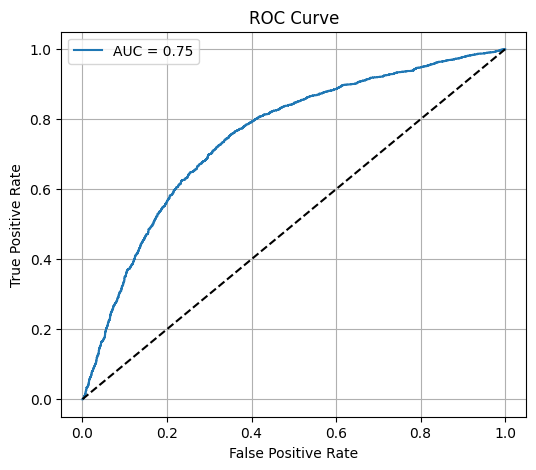

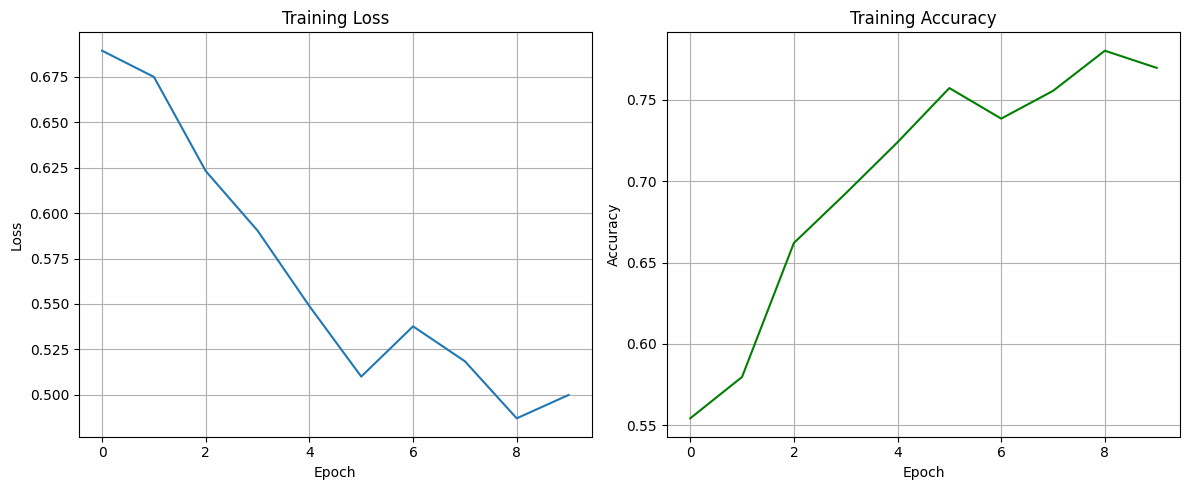

In [72]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Plot Loss dan Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label="Accuracy", color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.grid()

plt.tight_layout()
plt.show()
